In [1]:
import pandas as pd

df = pd.read_excel("LAST-NASIM.xlsx")
df.head()

,Issuer Name,Amt Issued,Issue Date,Maturity,Moody Rtg,S&P Rating,Currency,ISIN,Yld to Mty (Mid),Yield at Issue,Cpn,Moody's Rating Outlook,S&P Outlook,LQA Bid-Ask Spread,Market Cap
0,UBS Group AG,1.636152e+09,11/13/2023,#N/A Field Not Applicable,Baa3,BB,USD,USH42097ES26,8.877085,NaN,9.25,POS,NEG,0.292751,80112709880
1,UBS Group AG,1.636152e+09,11/13/2023,#N/A Field Not Applicable,Baa3,BB,USD,USH42097ER43,8.733408,4.492,9.25,POS,NEG,0.299266,80112709880
2,UBS Group AG,1.636152e+09,11/13/2023,#N/A Field Not Applicable,Baa3,BB,USD,US902613BF40,8.847124,NaN,9.25,POS,NEG,0.292751,80112709880
3,UBS Group AG,1.636152e+09,11/13/2023,#N/A Field Not Applicable,Baa3,BB,USD,US902613BE74,8.75293,NaN,9.25,POS,NEG,0.299266,80112709880
4,Danske Bank A/S,5.000000e+08,11/9/2023,11/9/2028,Baa2,BBB+,EUR,XS2715918020,4.548486,NaN,4.50,POS,STABLE,0.036886,150968527130


In [2]:
df.shape

(1081, 15)

In [3]:
df.isnull().sum()

Issuer Name                 0
Amt Issued                  6
Issue Date                  0
Maturity                    0
Moody Rtg                 111
S&P Rating                238
Currency                    0
ISIN                        0
Yld to Mty (Mid)            0
Yield at Issue            522
Cpn                        10
Moody's Rating Outlook     87
S&P Outlook               110
LQA Bid-Ask Spread         49
Market Cap                210
dtype: int64

In [4]:
len(df['ISIN'].unique())

1081

In [5]:
df_cleaned = df.dropna()
df_cleaned

,Issuer Name,Amt Issued,Issue Date,Maturity,Moody Rtg,S&P Rating,Currency,ISIN,Yld to Mty (Mid),Yield at Issue,Cpn,Moody's Rating Outlook,S&P Outlook,LQA Bid-Ask Spread,Market Cap
1,UBS Group AG,1.636152e+09,11/13/2023,#N/A Field Not Applicable,Baa3,BB,USD,USH42097ER43,8.733408,4.492,9.250,POS,NEG,0.299266,80112709880
5,JPMorgan Chase & Co,2.000000e+09,11/13/2023,11/13/2031,A1,A-,EUR,XS2717291970,4.24164,4.457,4.457,STABLE,STABLE,0.075852,443654140000
7,UBS Group AG,2.183378e+09,1/31/2019,#N/A Field Not Applicable,Baa3,BB,USD,USH4209UAT37,8.567314,7.000,7.000,POS,NEG,0.353673,80112709880
8,JPMorgan Chase & Co,2.813031e+09,10/23/2023,10/23/2034,A1,A-,USD,US46647PDY97,5.796943,6.254,6.254,STABLE,STABLE,0.067636,443654140000
9,Apple Inc,1.139425e+09,5/10/2023,5/10/2053,Aaa,AA+,USD,US037833EW60,5.084975,4.882,4.850,STABLE,STABLE,0.275028,2962954783520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,UBS Group AG,1.796606e+09,5/21/2015,5/15/2045,A3,A-,USD,US902613AZ13,5.963688,4.896,4.875,POS,NEG,0.446781,80112709880
945,UBS Group AG,2.300628e+09,3/26/2015,3/26/2025,A3,A-,USD,US902613AW81,6.129918,3.779,3.750,POS,NEG,0.087732,80112709880
966,UBS Group AG,1.766044e+09,4/18/2016,4/17/2026,A3,A-,USD,US902613BA52,5.901596,4.553,4.550,POS,NEG,0.098659,80112709880
997,AbbVie Inc,4.971659e+09,11/21/2019,11/21/2029,A3,A-,USD,US00287YBW84,5.098189,3.203,3.200,STABLE,STABLE,0.702837,245882865540


In [6]:
df_cleaned = df_cleaned[df["Market Cap"] != "#N/A Field Not Applicable"]
rating_mapping = {'NEG': -1, 'POS': 1, 'STABLE': 0}
df_cleaned['S&P Outlook'] = df_cleaned['S&P Outlook'].map(rating_mapping)
df_cleaned

C:\Users\Ayushee\AppData\Local\Temp\ipykernel_21620\1517857795.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df["Market Cap"] != "#N/A Field Not Applicable"]
C:\Users\Ayushee\AppData\Local\Temp\ipykernel_21620\1517857795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['S&P Outlook'] = df_cleaned['S&P Outlook'].map(rating_mapping)


,Issuer Name,Amt Issued,Issue Date,Maturity,Moody Rtg,S&P Rating,Currency,ISIN,Yld to Mty (Mid),Yield at Issue,Cpn,Moody's Rating Outlook,S&P Outlook,LQA Bid-Ask Spread,Market Cap
1,UBS Group AG,1.636152e+09,11/13/2023,#N/A Field Not Applicable,Baa3,BB,USD,USH42097ER43,8.733408,4.492,9.250,POS,-1,0.299266,80112709880
5,JPMorgan Chase & Co,2.000000e+09,11/13/2023,11/13/2031,A1,A-,EUR,XS2717291970,4.24164,4.457,4.457,STABLE,0,0.075852,443654140000
7,UBS Group AG,2.183378e+09,1/31/2019,#N/A Field Not Applicable,Baa3,BB,USD,USH4209UAT37,8.567314,7.000,7.000,POS,-1,0.353673,80112709880
8,JPMorgan Chase & Co,2.813031e+09,10/23/2023,10/23/2034,A1,A-,USD,US46647PDY97,5.796943,6.254,6.254,STABLE,0,0.067636,443654140000
9,Apple Inc,1.139425e+09,5/10/2023,5/10/2053,Aaa,AA+,USD,US037833EW60,5.084975,4.882,4.850,STABLE,0,0.275028,2962954783520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,UBS Group AG,1.796606e+09,5/21/2015,5/15/2045,A3,A-,USD,US902613AZ13,5.963688,4.896,4.875,POS,-1,0.446781,80112709880
945,UBS Group AG,2.300628e+09,3/26/2015,3/26/2025,A3,A-,USD,US902613AW81,6.129918,3.779,3.750,POS,-1,0.087732,80112709880
966,UBS Group AG,1.766044e+09,4/18/2016,4/17/2026,A3,A-,USD,US902613BA52,5.901596,4.553,4.550,POS,-1,0.098659,80112709880
997,AbbVie Inc,4.971659e+09,11/21/2019,11/21/2029,A3,A-,USD,US00287YBW84,5.098189,3.203,3.200,STABLE,0,0.702837,245882865540


In [7]:
from sklearn.discriminant_analysis import StandardScaler
scaler = StandardScaler()

final_df = df_cleaned.loc[:, ["LQA Bid-Ask Spread", "Yld to Mty (Mid)", "S&P Outlook"]]
X = scaler.fit_transform(final_df)
X

array([[ 0.78462314,  2.84680396, -1.67054304],
       [-0.94316829, -1.39738985,  0.48021727],
       [ 1.20538817,  2.68986437, -1.67054304],
       ...,
       [-0.76679026,  0.17107425, -1.67054304],
       [ 3.90568553, -0.58805095,  0.48021727],
       [ 1.92545132,  0.2693266 , -1.67054304]])

In [8]:
from sklearn.cluster import KMeans


n_clusters = 3

kmeans = KMeans(n_clusters = n_clusters)
final_df["Cluster"] = kmeans.fit_predict(X)
final_df["Cluster"] = final_df["Cluster"].astype("category")
final_df["Issuer Name"] = df_cleaned["Issuer Name"]
# final_df.to_csv("ex2.csv")
final_df.head()

c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,LQA Bid-Ask Spread,Yld to Mty (Mid),S&P Outlook,Cluster,Issuer Name
1,0.299266,8.733408,-1,2,UBS Group AG
5,0.075852,4.24164,0,1,JPMorgan Chase & Co
7,0.353673,8.567314,-1,2,UBS Group AG
8,0.067636,5.796943,0,1,JPMorgan Chase & Co
9,0.275028,5.084975,0,0,Apple Inc


<Axes: xlabel='LQA Bid-Ask Spread', ylabel='Yld to Mty (Mid)'>

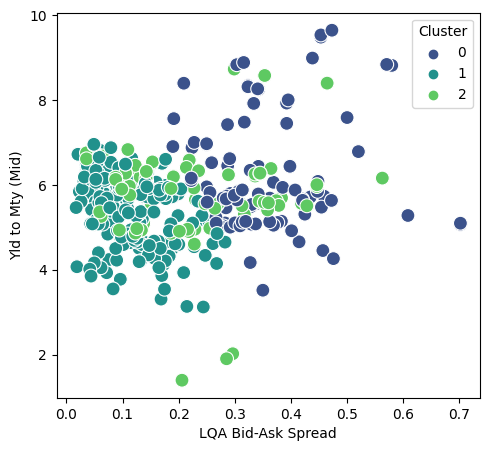

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.scatterplot(x='LQA Bid-Ask Spread', y='Yld to Mty (Mid)', hue='Cluster', data=final_df, palette='viridis', s=100, legend='full')

c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

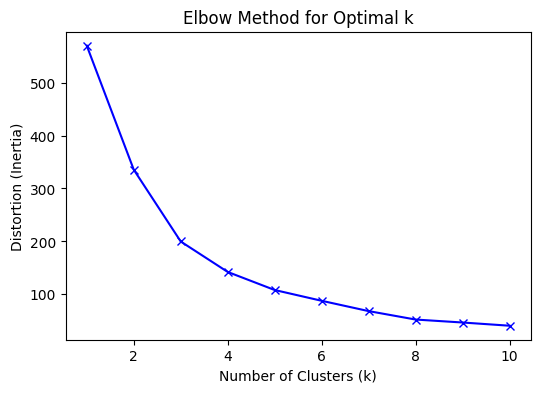

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(final_df[['Yld to Mty (Mid)', 'LQA Bid-Ask Spread', 'S&P Outlook']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()
